In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## News sentiment

C:\Users\Justin\AppData\Local\Temp\ipykernel_16540\3500964904.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df1, df2])


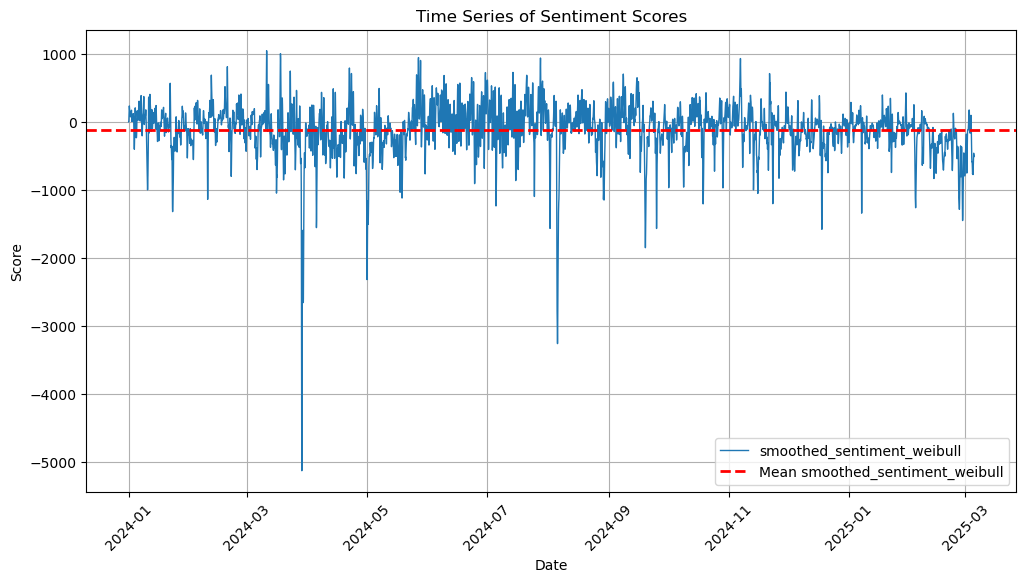

In [2]:
GDELT_folder_path = '../data/GDELT_Bitcoin_Sentiment/'
GDELT_file1 = os.path.join(GDELT_folder_path, "GDELT_with_4sentiments_hour_resolution_part1.csv")
GDELT_file2 = os.path.join(GDELT_folder_path,"GDELT_with_4sentiments_hour_resolution_part2.csv")


# Read CSV files
df1 = pd.read_csv(GDELT_file1)
df2 = pd.read_csv(GDELT_file2)

# Merge the two datasets
df = pd.concat([df1, df2])

# Select only specific columns
# df = df[['DATE', 'OverallScore', 'DecayedSentiment', 'NormalizedDecayedSentiment']]
df = df.reset_index(drop=True).rename(columns={'Unnamed: 0': 'DATE'})
# Convert DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Ensure numeric columns are actually numeric
# numeric_cols = ['OverallScore', 'DecayedSentiment', 'NormalizedDecayedSentiment']
# df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Sort by date to ensure correct time series plotting
df = df.sort_values(by='DATE')

# start_date = df['DATE'].min()
# end_date = start_date + pd.Timedelta(weeks=60)
# df_filtered = df[(df['DATE'] >= start_date) & (df['DATE'] < end_date)]

# Aggregate by hour instead of day: Compute the daily mean for each sentiment score
# df_daily = df_filtered.resample('H', on='DATE').mean().reset_index()

# Calculate the mean of 'NormalizedDecayedSentiment' for the first x weeks
mean_normalized_sentiment = df['smoothed_sentiment_weibull'].mean()

# Plot the time series with 3 lines
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['smoothed_sentiment_weibull'], label='smoothed_sentiment_weibull', linewidth=1)
plt.axhline(y=mean_normalized_sentiment, color='red', linestyle='--', linewidth=2, label="Mean smoothed_sentiment_weibull")

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Score")
plt.title("Time Series of Sentiment Scores")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


In [3]:
GDELT_df = df.rename(columns={'smoothed_sentiment_weibull': 'news_smoothed_sentiment_weibull'})
GDELT_df['DATE'] = pd.to_datetime(GDELT_df['DATE']).dt.tz_localize('UTC')
GDELT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10214 entries, 0 to 10213
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   DATE                             10214 non-null  datetime64[ns, UTC]
 1   smoothed_sentiment               10214 non-null  float64            
 2   news_smoothed_sentiment_weibull  10214 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 239.5 KB


In [4]:
GDELT_df

,DATE,smoothed_sentiment,news_smoothed_sentiment_weibull
0,2024-01-01 00:00:00+00:00,-10.561281,0.000000
1,2024-01-01 01:00:00+00:00,24.403801,-0.547465
2,2024-01-01 02:00:00+00:00,81.390333,15.977209
3,2024-01-01 03:00:00+00:00,149.256078,56.542854
4,2024-01-01 04:00:00+00:00,142.824226,106.318283
...,...,...,...
10209,2025-03-05 07:00:00+00:00,-982.982554,-467.002766
10210,2025-03-05 08:00:00+00:00,-969.584766,-482.226524
10211,2025-03-05 09:00:00+00:00,-963.660262,-500.983863
10212,2025-03-05 10:00:00+00:00,-893.485247,-511.361227


## BTC Price and Reddit Sentiment

In [5]:
processed_data_folder_path = '../data/processed/'
btc_reddit_data_path = os.path.join(processed_data_folder_path, "btc_usdt_hourly_processed_with_sentiment.csv")
btc_reddit_data = pd.read_csv(btc_reddit_data_path)

# Convert DATE column to datetime format
btc_reddit_data['datetime'] = pd.to_datetime(btc_reddit_data['datetime'])
btc_reddit_data = btc_reddit_data.sort_values(by='datetime')

In [6]:
btc_reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7930 entries, 0 to 7929
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datetime                    7930 non-null   datetime64[ns, UTC]
 1   OPEN                        7930 non-null   float64            
 2   HIGH                        7930 non-null   float64            
 3   LOW                         7930 non-null   float64            
 4   CLOSE                       7930 non-null   float64            
 5   TOTAL_TRADES                7930 non-null   int64              
 6   TOTAL_TRADES_BUY            7930 non-null   int64              
 7   TOTAL_TRADES_SELL           7930 non-null   int64              
 8   VOLUME                      7930 non-null   float64            
 9   VOLUME_BUY                  7930 non-null   float64            
 10  VOLUME_SELL                 7930 non-null   float64         

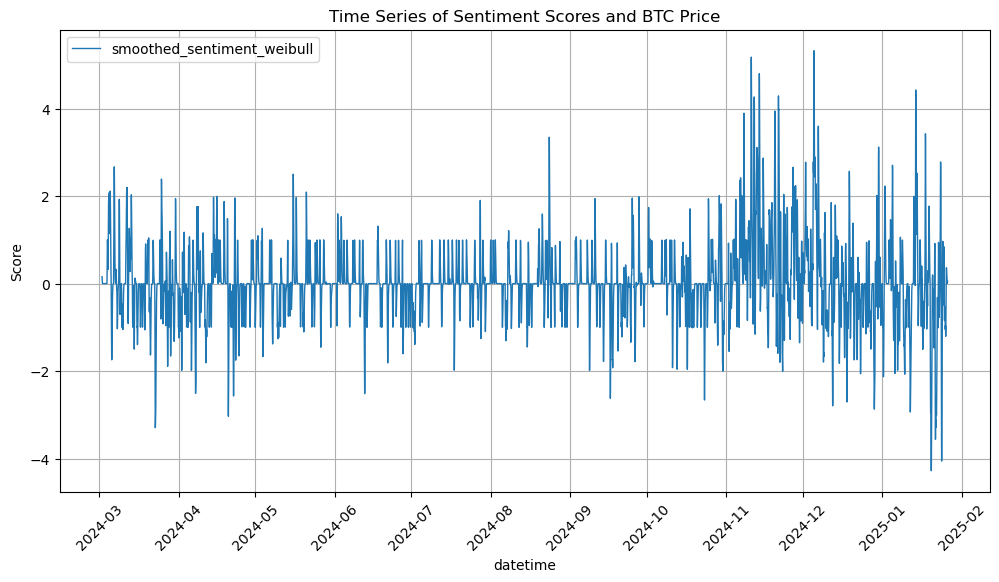

In [ ]:
# Plot btc price and sentiment

plt.figure(figsize=(12, 6))
plt.plot(btc_reddit_data['datetime'], btc_reddit_data['smoothed_sentiment_weibull'], label='smoothed_sentiment_weibull', linewidth=1)
# Formatting the plot
plt.xlabel("datetime")
plt.ylabel("Score")
plt.title("Time Series of Sentiment Scores")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [9]:
btc_reddit_data.columns


Index(['datetime', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'TOTAL_TRADES',
       'TOTAL_TRADES_BUY', 'TOTAL_TRADES_SELL', 'VOLUME', 'VOLUME_BUY',
       'VOLUME_SELL', 'return', 'log_return', 'hourly_volatility', 'EMA_8',
       'EMA_13', 'EMA_21', 'EMA_signal', 'EMA_short', 'EMA_long', 'MACD',
       'Signal_Line', 'MACD_Signal', 'MACD_Hist', 'SMA20', 'STD20', 'Upper_BB',
       'Lower_BB', 'RSI_14', 'BB_RSI_Signal', 'RSI_Signal', 'SMA_50',
       'SMA_200', 'GoldenCross_Signal', '%K', '%D', 'Stochastic_Signal', 'OBV',
       'OBV_EMA20', 'OBV_Signal', 'H-L', 'H-PC', 'L-PC', 'TR', 'ATR',
       'smoothed_sentiment', 'smoothed_sentiment_weibull', 'post_density'],
      dtype='object')

In [10]:
# Create a new dataframe with selected features
btc_reddit_data_selected_features = btc_reddit_data[['datetime',  
                       'EMA_8','EMA_13','EMA_21','EMA_signal','EMA_short','EMA_long', 
                       'MACD','Signal_Line','MACD_Hist', # MACD Signal
                       'Upper_BB', 'Lower_BB', # Bollinger Bands Signal
                       'RSI_14', 'BB_RSI_Signal', 'RSI_Signal', # RSI Signal
                       'SMA_50', 'SMA_200', 'GoldenCross_Signal', # Golden Cross Signal
                       '%K', '%D', 'Stochastic_Signal', # Stochastic Oscillator Signal
                       'OBV','OBV_EMA20', 'OBV_Signal', # OBV Signal
                       'ATR', # ATR, volatility
                       'smoothed_sentiment_weibull',
                       'return',
                       'hourly_volatility',
                       'TOTAL_TRADES', # Trade is number of trades (someone put buy or sell order)
                       'VOLUME' # Volume is amount of cryptocurrency traded in BTC
                      ]]


In [11]:
btc_reddit_data_selected_features.rename(columns={'smoothed_sentiment_weibull': 'reddit_smoothed_sentiment_weibull'}, inplace=True)

C:\Users\Justin\AppData\Local\Temp\ipykernel_16540\2939886257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_reddit_data_selected_features.rename(columns={'smoothed_sentiment_weibull': 'reddit_smoothed_sentiment_weibull'}, inplace=True)


## Telegram Data

In [12]:
processed_data_folder_path = '../data/processed/'
telegram_data_path = os.path.join(processed_data_folder_path, "tele_messages_processed_hourly.csv")
btc_telegram_data = pd.read_csv(telegram_data_path, index_col=0).reset_index().rename(columns = {'index': 'date'})

# Convert DATE column to datetime format
btc_telegram_data['date'] = pd.to_datetime(btc_telegram_data['date'])
btc_telegram_data = btc_telegram_data.sort_values(by='date').reset_index(drop = True)

In [13]:
btc_telegram_data.columns

Index(['date', 'text', 'channel_FedRussianInsiders',
       'channel_TechCryptoAnalyst', 'channel_Whalesguide',
       'channel_binancekillers', 'channel_cryptoclubpump',
       'channel_wallstreetqueenofficial', 'year', 'week', 'day', 'sentiment',
       'smoothed_sentiment', 'smoothed_sentiment_weibull'],
      dtype='object')

In [14]:
tele_data = btc_telegram_data[['date', 'smoothed_sentiment_weibull']]
tele_data.rename(columns={'smoothed_sentiment_weibull':'tele_smoothed_sentiment_weibull'},inplace=True)
tele_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   date                             3240 non-null   datetime64[ns, UTC]
 1   tele_smoothed_sentiment_weibull  3240 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 50.8 KB


C:\Users\Justin\AppData\Local\Temp\ipykernel_16540\1556081304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tele_data.rename(columns={'smoothed_sentiment_weibull':'tele_smoothed_sentiment_weibull'},inplace=True)


In [15]:
tele_data

,date,tele_smoothed_sentiment_weibull
0,2024-01-01 06:00:00+00:00,0.000000
1,2024-01-01 11:00:00+00:00,0.997521
2,2024-01-01 15:00:00+00:00,1.516302
3,2024-01-01 20:00:00+00:00,1.388481
4,2024-01-01 20:00:00+00:00,1.388481
...,...,...
3235,2025-03-03 20:00:00+00:00,2.393790
3236,2025-03-04 08:00:00+00:00,-0.106279
3237,2025-03-04 09:00:00+00:00,0.160330
3238,2025-03-04 14:00:00+00:00,0.912138


## MERGE

In [16]:
merged_df = btc_reddit_data_selected_features.merge(GDELT_df, left_on='datetime', right_on = "DATE", how='left').merge(tele_data, left_on='datetime', right_on = "date", how='left')
merged_df.drop(columns=['date','DATE'], inplace=True)
merged_df = merged_df.fillna(0)


In [19]:
merged_df_path = '../data/processed/merged_df.csv'

merged_df.to_csv(merged_df_path, index=False)